In [1]:

pip --version

pip 25.0.1 from /opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/pip (python 3.13)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [3]:
import netCDF4
print(netCDF4.__version__)


1.7.2


In [11]:
from netCDF4 import Dataset

# Load the NetCDF file
file_path = "/Users/tbanderso/Desktop/UPSA/L3/S2/projet IBI/sst.mon.ltm.1991-2020.nc"
nc = Dataset(file_path, mode='r')

# Print variables available in the dataset
print(nc.variables.keys())

# Access a specific variable (e.g., sea surface temperature)
sst = nc.variables['sst'][:]  # Replace 'sst' with the correct variable name
print(sst)
print(nc['sst'])

dict_keys(['lat', 'lon', 'time', 'climatology_bounds', 'sst', 'valid_yr_count'])
[[[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-1.737828016281128 -1.7391291856765747 -1.7396562099456787 ...
   -1.7397956848144531 -1.7395484447479248 -1.7379679679870605]
  [-1.7416880130767822 -1.7440322637557983 -1.7447956800460815 ...
   -1.7455805540084839 -1.7453010082244873 -1.742053747177124]
  [-1.7493222951889038 -1.7491286993026733 -1.748956561088562 ...
   -1.7483115196228027 -1.7486662864685059 -1.7490640878677368]]

 [[-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  [-- -- -- ... -- -- --]
  ...
  [-1.7423739433288574 -1.7428992986679077 -1.742828369140625 ...
   -1.74410080909729 -1.743871808052063 -1.7428895235061646]
  [-1.7459335327148438 -1.7471890449523926 -1.746747374534607 ...
   -1.747920274734497 -1.7484157085418701 -1.7466099262237549]
  [-1.7530455589294434 -1.7528386116027832 -1.7502868175506592 ...
   -1.7503098249435425 -1.7524248361

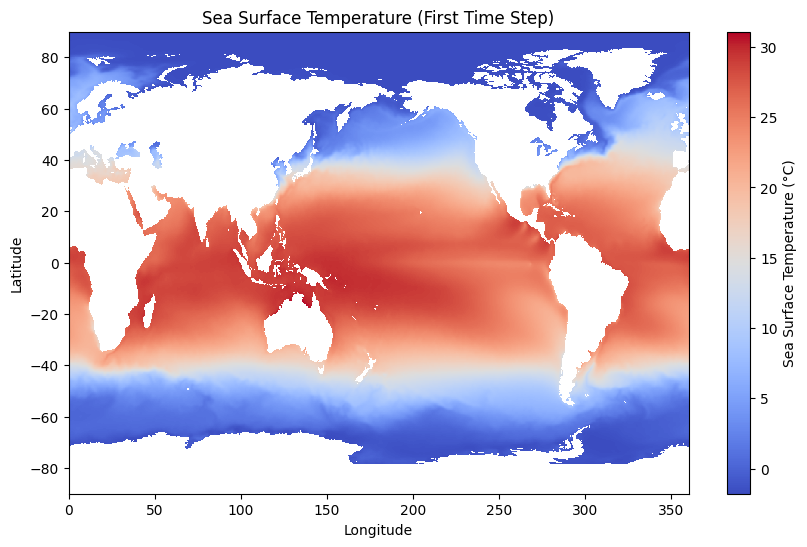

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Extract latitude, longitude, and SST data
lats = nc.variables['lat'][:]  # Latitude
lons = nc.variables['lon'][:]  # Longitude
sst = nc.variables['sst'][:]   # SST (Time, Lat, Lon)

# Select the first time step
sst_first_timestep = sst[0, :, :]

# Create the plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(lons, lats, sst_first_timestep, shading='auto', cmap='coolwarm')
plt.colorbar(label="Sea Surface Temperature (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Sea Surface Temperature (First Time Step)")
plt.show()

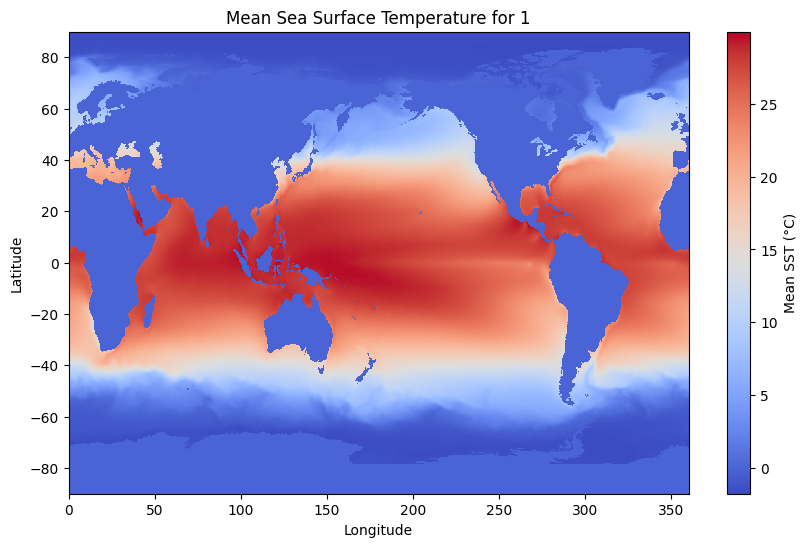

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset, num2date

# Load the NetCDF file
file_path = "/Users/tbanderso/Desktop/UPSA/L3/S2/projet IBI/sst.mon.ltm.1991-2020.nc"
nc = Dataset(file_path, mode='r')

# Extract relevant data
lats = nc.variables['lat'][:]  # Latitude
lons = nc.variables['lon'][:]  # Longitude
sst = nc.variables['sst'][:]   # SST (Time, Lat, Lon)
time_var = nc.variables['time']  # Time variable

# Convert time values to actual dates
dates = num2date(time_var[:], time_var.units)

# Extract years from the date array
years = np.array([date.year for date in dates])

# Get unique years
unique_years = np.unique(years)

# Compute yearly mean SST
yearly_mean_sst = []
for year in unique_years:
    yearly_sst = sst[years == year, :, :]  # Select SST data for the current year
    yearly_mean_sst.append(np.mean(yearly_sst, axis=0))  # Compute mean over months

# Convert list to NumPy array
yearly_mean_sst = np.array(yearly_mean_sst)

# Plot yearly mean SST for the first year as an example
plt.figure(figsize=(10, 6))
plt.pcolormesh(lons, lats, yearly_mean_sst[0, :, :], shading='auto', cmap='coolwarm')
plt.colorbar(label="Mean SST (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(f"Mean Sea Surface Temperature for {unique_years[0]}")
plt.show()

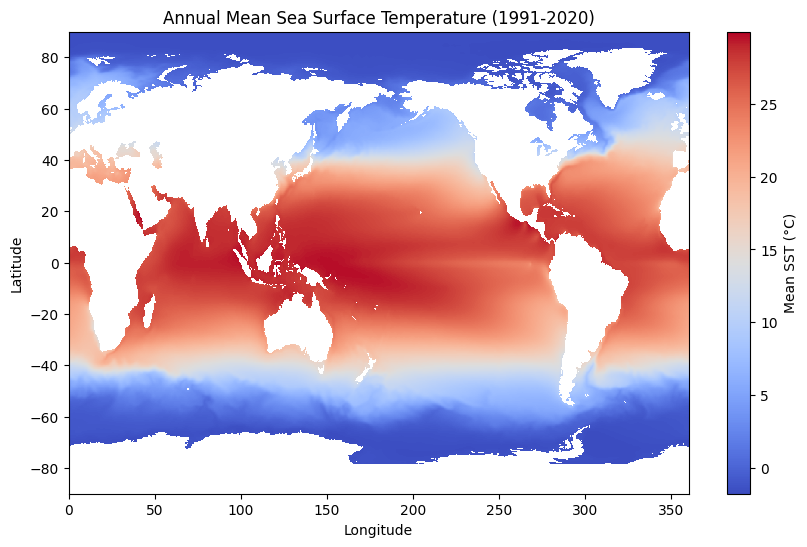

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# Load the NetCDF file
file_path = "/Users/tbanderso/Desktop/UPSA/L3/S2/projet IBI/sst.mon.ltm.1991-2020.nc"
nc = Dataset(file_path, mode='r')

# Extract latitude, longitude, and SST
lats = nc.variables['lat'][:]   # Latitude
lons = nc.variables['lon'][:]   # Longitude
sst = nc.variables['sst'][:]    # SST (12, 720, 1440) → Monthly climatology

# Compute the annual mean SST by averaging over all 12 months
annual_mean_sst = np.mean(sst, axis=0)  # Shape: (720, 1440)

# Plot the annual mean SST
plt.figure(figsize=(10, 6))
plt.pcolormesh(lons, lats, annual_mean_sst, shading='auto', cmap='coolwarm')
plt.colorbar(label="Mean SST (°C)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Annual Mean Sea Surface Temperature (1991-2020)")
plt.show()